In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
Dataframe = pd.read_csv(R'C:\Users\kpt89\OneDrive\Desktop\Studies\5TH sem\PR\Project\updated\Python_Code\WineQuality_Dataset_PY_final.csv')

In [25]:
Dataframe.head()


,type,volatile acidity,chlorides,density,alcohol,quality
0,white,0.27,0.045,1.0010,8.8,6
1,white,0.30,0.049,0.9940,9.5,6
2,white,0.28,0.050,0.9951,10.1,6
3,white,0.23,0.058,0.9956,9.9,6
4,white,0.23,0.058,0.9956,9.9,6


In [26]:
Dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              6497 non-null   object 
 1   volatile acidity  6497 non-null   float64
 2   chlorides         6497 non-null   float64
 3   density           6497 non-null   float64
 4   alcohol           6497 non-null   float64
 5   quality           6497 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 304.7+ KB


In [27]:
Dataframe.describe()


,volatile acidity,chlorides,density,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.339666,0.056034,0.994697,10.491801,5.818378
std,0.164636,0.035034,0.002999,1.192712,0.873255
min,0.080000,0.009000,0.987110,8.000000,3.000000
25%,0.230000,0.038000,0.992340,9.500000,5.000000
50%,0.290000,0.047000,0.994890,10.300000,6.000000
75%,0.400000,0.065000,0.996990,11.300000,6.000000
max,1.580000,0.611000,1.038980,14.900000,9.000000


In [28]:
Dataframe.isnull().sum()


type                0
volatile acidity    0
chlorides           0
density             0
alcohol             0
quality             0
dtype: int64

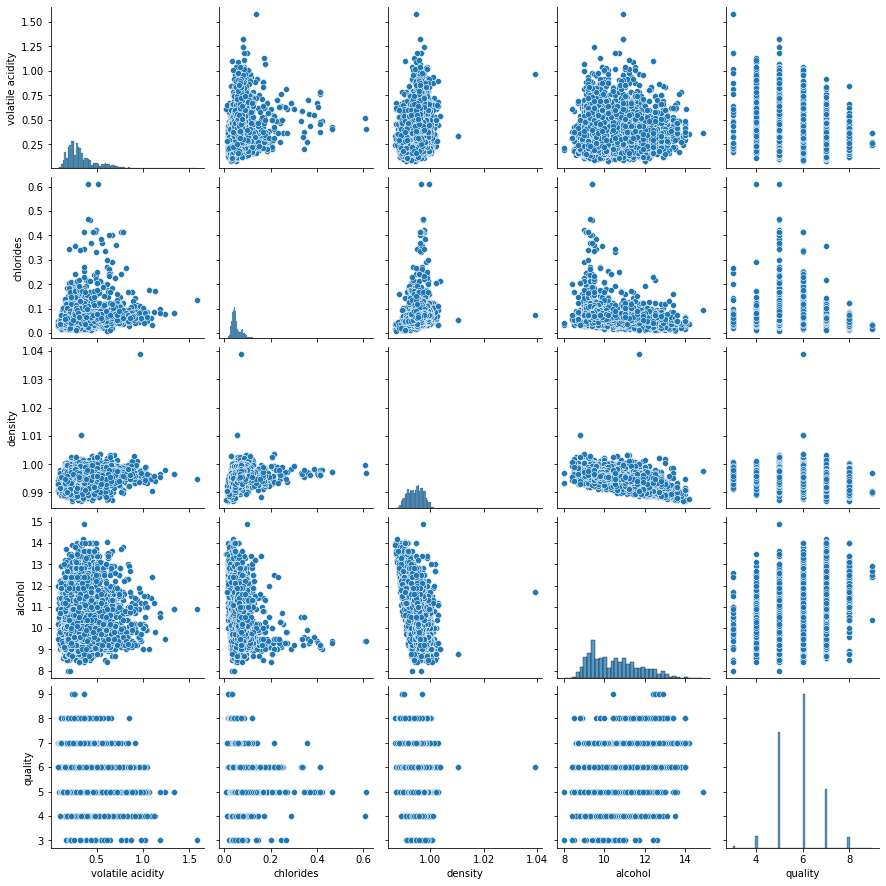

In [29]:
sb.pairplot(Dataframe)
plt.show()


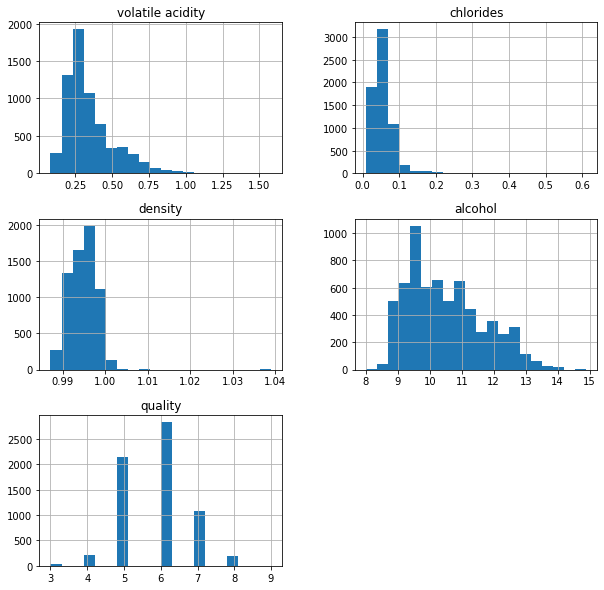

In [30]:
Dataframe.hist(bins=20,figsize=(10,10))
plt.show()


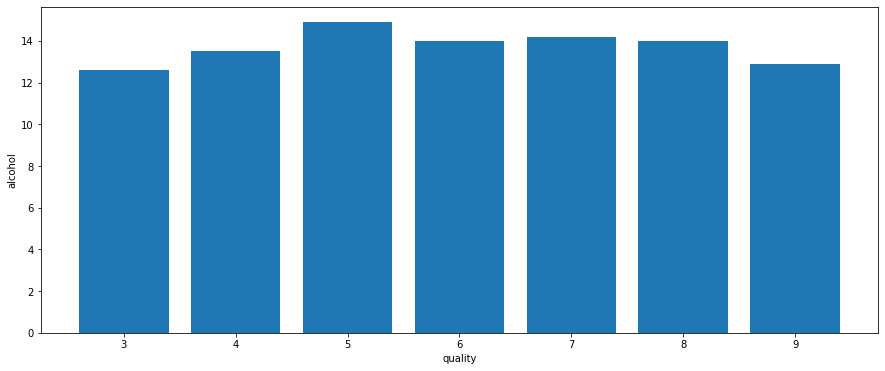

In [31]:
df = Dataframe
plt.figure(figsize=[15,6])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

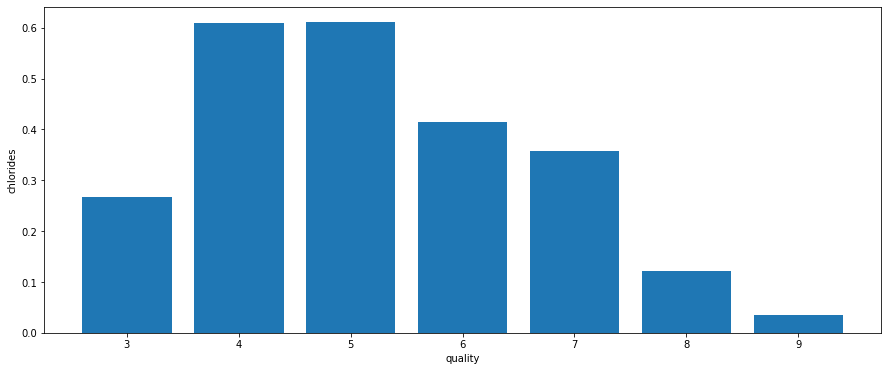

In [32]:
df = Dataframe
plt.figure(figsize=[15,6])
plt.bar(df['quality'],df['chlorides'])
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

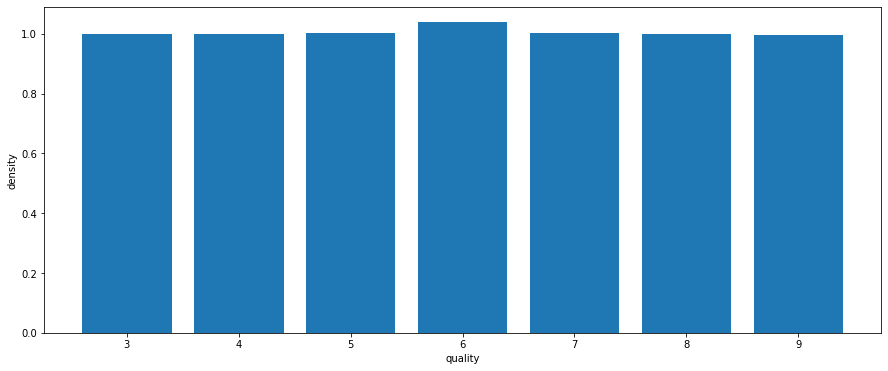

In [33]:
df = Dataframe
plt.figure(figsize=[15,6])
plt.bar(df['quality'],df['density'])
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

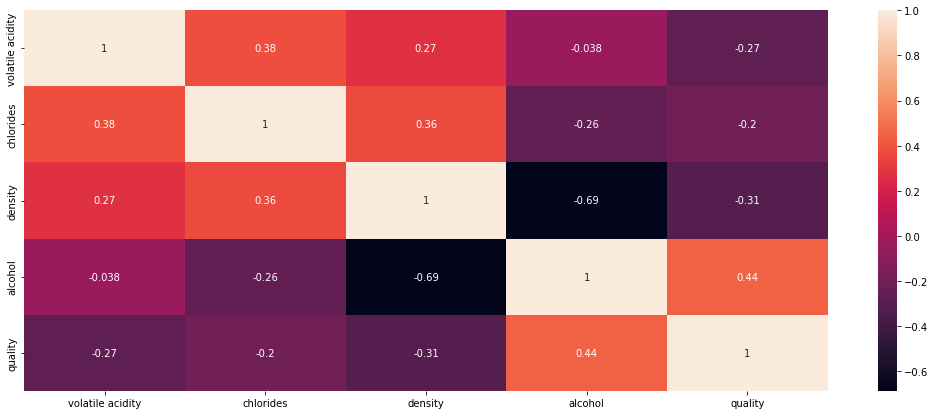

In [34]:
plt.figure(figsize=[18,7])
# plot correlation
sb.heatmap(Dataframe.corr(),annot=True)
plt.show()

In [35]:
colm = []
i=0
j=0
# loop for columns
for i in range(len(Dataframe.corr().keys())):
# loop for rows
  for j in range(j):
    if abs(Dataframe.corr().iloc[i,j]) > 0.7:
      colm = Dataframe.corr().columns[i]

In [36]:
new_df = Dataframe.drop('alcohol',axis = 1)

In [37]:
new_df.update(new_df.fillna(new_df.mean()))

C:\Users\kpt89\AppData\Local\Temp/ipykernel_11044/1435263875.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.update(new_df.fillna(new_df.mean()))


In [38]:
# no of categorical columns
cat = new_df.select_dtypes(include='O')
# create dummies of categorical columns
df_dummies = pd.get_dummies(new_df,drop_first = True)
print(df_dummies)

      volatile acidity  chlorides  density  quality  type_white
0                0.270      0.045  1.00100        6           1
1                0.300      0.049  0.99400        6           1
2                0.280      0.050  0.99510        6           1
3                0.230      0.058  0.99560        6           1
4                0.230      0.058  0.99560        6           1
...                ...        ...      ...      ...         ...
6492             0.600      0.090  0.99490        5           0
6493             0.550      0.062  0.99512        6           0
6494             0.510      0.076  0.99574        6           0
6495             0.645      0.075  0.99547        5           0
6496             0.310      0.067  0.99549        6           0

[6497 rows x 5 columns]


In [39]:
df_dummies['best quality']=[1 if x>=7 else 0 for x in Dataframe.quality]
print(df_dummies)

      volatile acidity  chlorides  density  quality  type_white  best quality
0                0.270      0.045  1.00100        6           1             0
1                0.300      0.049  0.99400        6           1             0
2                0.280      0.050  0.99510        6           1             0
3                0.230      0.058  0.99560        6           1             0
4                0.230      0.058  0.99560        6           1             0
...                ...        ...      ...      ...         ...           ...
6492             0.600      0.090  0.99490        5           0             0
6493             0.550      0.062  0.99512        6           0             0
6494             0.510      0.076  0.99574        6           0             0
6495             0.645      0.075  0.99547        5           0             0
6496             0.310      0.067  0.99549        6           0             0

[6497 rows x 6 columns]
